# Fourier methods

We will first generate a signal, as the sum of many sine functions. Then, we will compute its FFT, and show the power spectrum. 

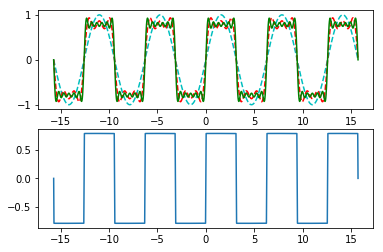

In [2]:
# Create boxcar series with sines

import numpy as np
import matplotlib.pyplot as plt

# Create x vector
pi = np.pi
x  = np.linspace(-5*pi,5*pi,1001)

y01 =      np.sin(   x)
y03 = 1/3 *np.sin(3 *x)
y05 = 1/5 *np.sin(5 *x)
y07 = 1/7 *np.sin(7 *x)
y09 = 1/9 *np.sin(9 *x)
y11 = 1/11*np.sin(11*x)

y1 = y01
y2 = y01 + y03
y3 = y01 + y03 + y05
y4 = y01 + y03 + y05 + y07
y5 = y01 + y03 + y05 + y07 + y09
y6 = y01 + y03 + y05 + y07 + y09 + y11

# Longer version of sines
yfull = np.zeros(len(x))
kmax  = 10000

for k in range(kmax):
    if (k%2 == 0):
        continue
    yfull = yfull + 1/k*np.sin(k*x)

fig = plt.figure()
ax  = fig.add_subplot(211)
ax.plot(x,y1,'c--')
#ax.plot(x,y2,'k--')
ax.plot(x,y3,'r--')
#ax.plot(x,y4,'b-')
#ax.plot(x,y5,'m-')
ax.plot(x,y6,'g-')
ax  = fig.add_subplot(212)
ax.plot(x,yfull)
plt.show()


# Análisis de Fourier

Asume que nos dan una función, o una serie de tiempo o unos datos geológicos ...
y los analizamos con métodos de Fourier
- Sacar la transformada discreta de Fourier (FFT)
- Graficar el espectro de potencia (o de amplitud)



(0, 100)

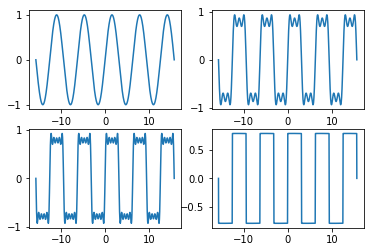

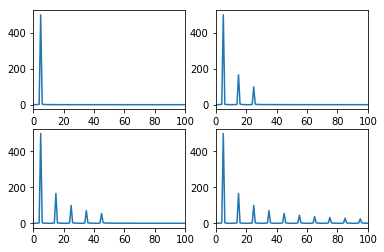

In [7]:
# transformada de Fourier

Fy1    = np.fft.fft(y1)
Fy2    = np.fft.fft(y2)
Fy3    = np.fft.fft(y3)
Fy4    = np.fft.fft(y4)
Fy5    = np.fft.fft(y5)
Fy6    = np.fft.fft(y6)
Fyfull = np.fft.fft(yfull)

# Graficar el resultado del FFT

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(x,y1)
ax2 = fig.add_subplot(2,2,2)
ax2.plot(x,y3)
ax3 = fig.add_subplot(2,2,3)
ax3.plot(x,y5)
ax4 = fig.add_subplot(2,2,4)
ax4.plot(x,yfull)


fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(np.abs(Fy1))
ax1.set_xlim(0, 100)
ax2 = fig.add_subplot(2,2,2)
ax2.plot(np.abs(Fy3))
ax2.set_xlim(0, 100)
ax3 = fig.add_subplot(2,2,3)
ax3.plot(np.abs(Fy5))
ax3.set_xlim(0, 100)
ax4 = fig.add_subplot(2,2,4)
ax4.plot(np.abs(Fyfull))
ax4.set_xlim(0, 100)


257


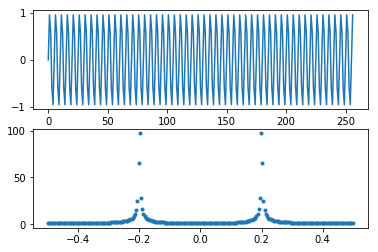

In [8]:
# nuevo test, con señal simple

import math
import numpy as np
import matplotlib.pyplot as plt

f0 = 0.2   # frecuencia de interés

t    = np.arange(257)
data = np.sin(2*pi*f0*t)

fdata = np.fft.fft(data)
freq  = np.fft.fftfreq(len(data))

print(t.shape[-1])
# Graficar
fig = plt.figure()
ax  = fig.add_subplot(211)
ax.plot(t,data)
ax2 = fig.add_subplot(212)
ax2.plot(freq,abs(fdata),'.')


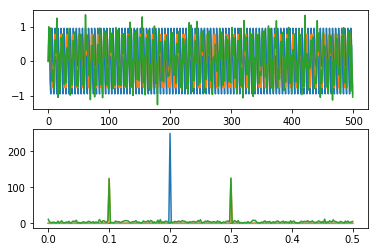

In [9]:
# Otro ejemplo con datos ficticios


import random

npts = 500
f1   = 0.2
f2   = 0.1
f3   = 0.3

t = np.arange(npts)

xnoise = np.random.normal(0.0,0.1,npts)
xsin1  = 0.5*np.sin(2*pi*f2*t)
xsin2  = 0.5*np.sin(2*pi*f3*t)

data2  = xsin1 + xsin2 + 2.*xnoise
data3  = xsin1 + xsin2
data   = np.sin(2*pi*f1*t)

freq   = np.fft.fftfreq(npts)
if (npts%2 ==0):
    nf = round(npts/2.) + 1
else:
    nf = round((npts+1)/2)
freq = abs(freq[0:nf])

spec = np.fft.fft(data)
spec = np.abs(spec[0:nf])
spec2 = np.fft.fft(data2)
spec2 = np.abs(spec2[0:nf])
spec3 = np.fft.fft(data3)
spec3 = np.abs(spec3[0:nf])

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(t,data)
ax1.plot(t,data3)
ax1.plot(t,data2)
ax2 = fig.add_subplot(2,1,2)
ax2.plot(freq,spec)
ax2.plot(freq,spec3)
ax2.plot(freq,spec2)

# Test con datos de 018

Text(0.5, 0, 'Periodo (años)')

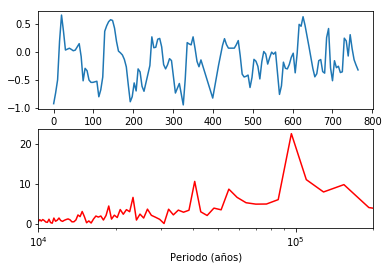

In [32]:
import amp_spec
import math
import numpy as np
import matplotlib.pyplot as plt

# Load file
fname = 'O18.dat'
data = np.loadtxt(fname)
npts = np.size(data)

# Serie de tiempo
dt   = 4930 # años
t    = np.arange(npts)*dt

# Calcular el espectro de amplitudes
freq, spec = amp_spec.amp_spec(data,dt)
Per        = np.zeros(len(freq))
Per[1:]    = 1./freq[1:]

# Figure de los datos
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(t/1000,data)
ax1.set_xlabel('Tiempo (miles de años)')

ax2 = fig.add_subplot(2,1,2)
ax2.semilogx(Per[1:],spec[1:],'r')
ax2.set_xlim(10000, 200000)
ax2.set_xlabel('Periodo (años)')


Note en la figura, que hay picos en el espectro en periodos de 
- 100.000 años
- 40.000 años
- 22.000 años 
- otros más 

Muchos relacionados con los ciclos de Milankovitch.
